In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Load data

In [2]:
# Read data into a pandas dataframe
all_data = pd.read_csv("Building_in_Hurricane.csv")
all_data.head()

,overall_building_condition,max_mph,age_yrs,number_of_stories,roof_shape,roof_cover,wall_cladding,structural_framing_system
0,0,80,14.0,1.0,Complex,Tile (clay),Stucco,Wood-frame
1,1,80,29.0,2.0,Gable,Tile (clay),Stucco,Wood-frame
2,0,85,27.0,2.0,Complex,Tile (clay),Stucco,Wood-frame
3,1,85,24.0,1.0,Hip,Asphalt shingles (laminated),Stucco,Wood-frame
4,1,85,30.0,2.0,Gable,Asphalt shingles (laminated),Wood Siding,Wood-frame


## 2. Data preprocessing
### Prepare input and output data

In [3]:
X = all_data.iloc[:, [1,2,3,4,5,6,7]].values
Y = all_data.iloc[:, 0]

print('X shape: ', X.shape)
print('X: ', X)
print('y shape: ', Y.shape)
print('Y: ', Y)

X shape:  (926, 7)
X:  [[80 14.0 1.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 [80 29.0 2.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 [85 27.0 2.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 ...
 [105 22.0 2.0 ... 'Asphalt shingles (3-tab)' 'Vinyl Siding' 'Wood-frame']
 [100 16.0 1.0 ... 'Asphalt shingles (3-tab)' 'Stucco' 'Wood-frame']
 [105 50.0 2.0 ... 'Asphalt shingles (3-tab)' 'Wood Siding' 'Wood-frame']]
y shape:  (926,)
Y:  0      0
1      1
2      0
3      1
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     0
12     0
13     0
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
896    2
897    0
898    1
899    2
900    0
901    1
902    1
903    1
904    1
905    2
906    1
907    0
908    1
909    1
910    1
911    2
912    0
913    2
914    1
915    0
916    1
917    0
918    1
919    1
920    2
921    1
922    1
923    1
924    0
925    2
Name: overall_buil

In [4]:
Y.value_counts()

1    441
0    288
2    197
Name: overall_building_condition, dtype: int64

### Encode categorical variables

In [5]:
# Encoding Categorical Variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X[:,3] = le.fit_transform(X[:,3]) #roof_shape
X[:,4] = le.fit_transform(X[:,4]) #roof_cover
X[:,5] = le.fit_transform(X[:,5]) #wall_cladding
X[:,6] = le.fit_transform(X[:,6]) #structural_framing_system


In [6]:
X[1,3]

2

In [7]:
class_names = ['No Damage','Moderately Damaged','Destroyed']

### Split into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1993)

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)


X_train shape:  (740, 7)
Y_train shape:  (740,)
X_test shape:  (186, 7)
Y_test shape:  (186,)


## 3. MODELS

### 3.1 Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(max_iter=2000)

logisticRegressionModel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression  Mean accuracy (train) is   :  0.5621621621621622
LogisticRegression  Mean accuracy (test)  is   :  0.510752688172043
LogisticRegression  F1 Score      (test)  is   :  0.510752688172043
Confusion matrix, without normalization


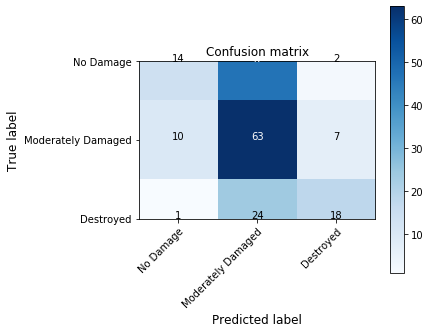

In [10]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = logisticRegressionModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.2 Decision Tree 

In [11]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(max_depth=None, random_state = 1993)
decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1993, splitter='best')

DecisionTreeClassifier  Mean accuracy (train) is   :  0.9702702702702702
DecisionTreeClassifier  Mean accuracy (test)  is   :  0.5860215053763441
DecisionTreeClassifier  F1 Score      (test)  is   :  0.5860215053763441
Confusion matrix, without normalization


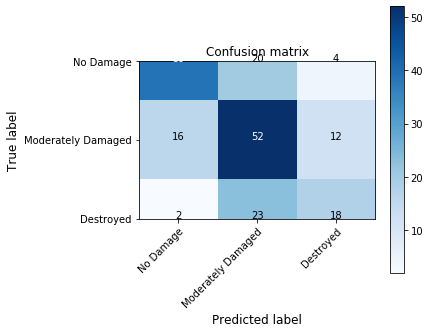

In [12]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = decisionTreeModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.3 Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=50, max_depth=10, random_state = 1993)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1993,
                       verbose=0, warm_start=False)

RandomForestClassifier  Mean accuracy (train) is   :  0.9216216216216216
RandomForestClassifier  Mean accuracy (test)  is   :  0.6451612903225806
RandomForestClassifier  F1 Score      (test)  is   :  0.6451612903225806
Confusion matrix, without normalization


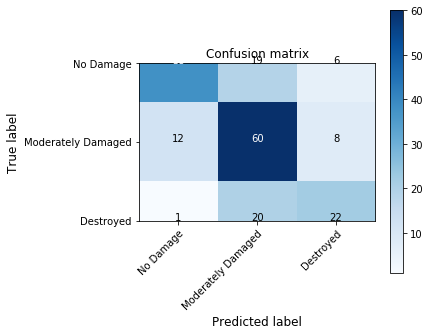

In [14]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = randomForestModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.4 K-Nearest Neighbors 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 3)

knnModel.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier  Mean accuracy (train) is   :  0.7702702702702703
KNeighborsClassifier  Mean accuracy (test)  is   :  0.5913978494623656
KNeighborsClassifier  F1 Score      (test)  is   :  0.5913978494623656
Confusion matrix, without normalization


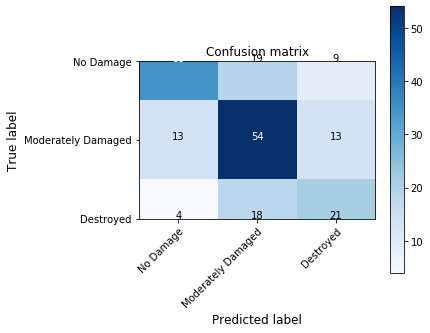

In [16]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = knnModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

### 3.5 Support Vector Machine


In [17]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'linear', random_state = 1993)

SVCModel.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1993, shrinking=True,
    tol=0.001, verbose=False)

SVC  Mean accuracy (train) is   :  0.5283783783783784
SVC  Mean accuracy (test)  is   :  0.46774193548387094
SVC  F1 Score      (test)  is   :  0.46774193548387094
Confusion matrix, without normalization


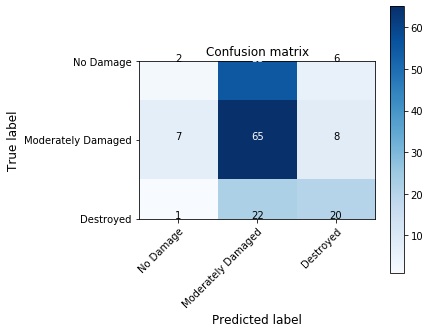

In [18]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = SVCModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

## 3.6 Multilayer Perceptron (Neural Network)

In [19]:
from sklearn.neural_network import MLPClassifier

MLPModel = MLPClassifier(hidden_layer_sizes=(6,6,6,6), random_state=1993)

MLPModel.fit(X_train,Y_train)

/Users/Milad/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 6, 6, 6), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1993, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier  Mean accuracy (train) is   :  0.5459459459459459
MLPClassifier  Mean accuracy (test)  is   :  0.5161290322580645
MLPClassifier  F1 Score      (test)  is   :  0.5161290322580645
Confusion matrix, without normalization


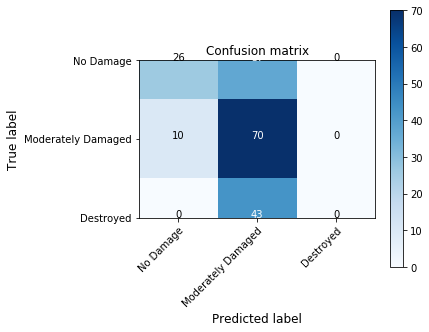

In [20]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = MLPModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)